In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import seaborn as sn
import matplotlib.pyplot as plt

In [77]:
#Question1
#a

col_names = ["area", "perimeter", "compactness", "length_of_kernel",
"width_of_kernel", "asymetry", "length_groove", "class"]

seed_data = pd.read_csv("seeds_dataset.txt", sep='\\t+', header=None,
engine="python", names=col_names)

X = seed_data[["area", "perimeter", "compactness", "length_of_kernel",
"width_of_kernel", "asymetry", "length_groove"]]
Y = seed_data["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=0)

/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


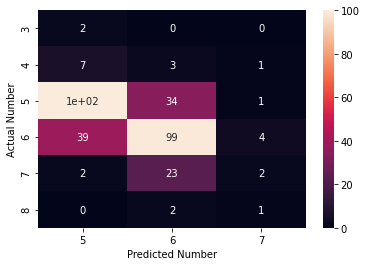

The accuracy score was measured to be  0.628125


In [98]:
X = dataset[columns[:len(columns)-1]]
y = dataset[columns[-1]]
# I think thi is a repeat. However, I like it here. 

logistic_regression= LogisticRegression()

logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

lr_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual Number'], colnames=['Predicted Number'])
sn.heatmap(lr_matrix, annot=True)

plt.show()
print('The accuracy score was measured to be ', metrics.accuracy_score(y_test, y_pred)) 

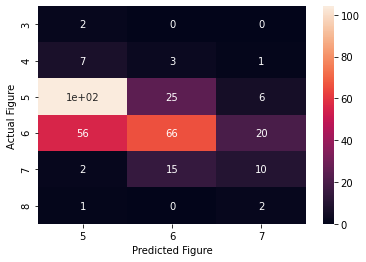

The accuracy score was measured to be   0.5625


In [99]:
#b
decision_tree_classifier = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

dts_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual Figure'], colnames=['Predicted Figure'])

sn.heatmap(dts_matrix, annot=True)

plt.show()

print('The accuracy score was measured to be  ', metrics.accuracy_score(y_test, y_pred))

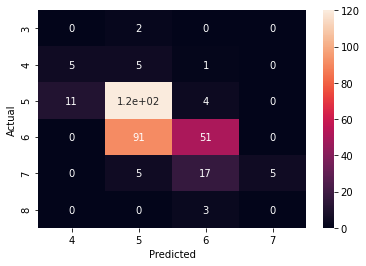

The score is  0.565625


In [90]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = y_pred.astype(int)

r_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual Figure'], colnames=['Predicted Figure'])
sn.heatmap(r_matrix, annot=True)

plt.show()
print('The score is ', metrics.accuracy_score(y_test, y_pred))

In [95]:
# Question2
wine_quality = pd.read_csv("winequality.csv")

columns = list(wine_quality.columns)
X = wine_quality[columns[:len(columns)-1]]
y = wine_quality[columns[-1]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

/Users/christinawilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.628125


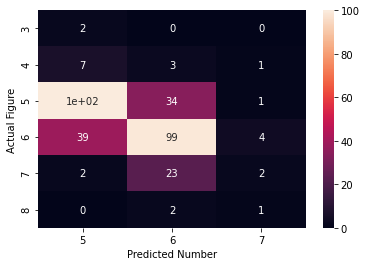

In [100]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

regression_matrix2 = pd.crosstab(y_test, y_pred, rownames=['Actual Figure'], colnames=['Predicted Number'])
sn.heatmap(regression_matrix2, annot=True)
print(metrics.accuracy_score(y_test, y_pred))
plt.show()


Accuracy:  0.5625


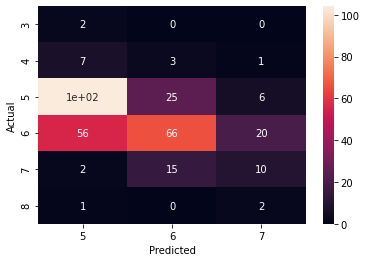

In [38]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

dts_matrix2 = pd.crosstab(y_test, y_pred, rownames=['Actual Number'], colnames=['Predicted Figure'])
sn.heatmap(dts_matrix2, annot=True)
print( metrics.accuracy_score(y_test, y_pred))
plt.show()

0.565625


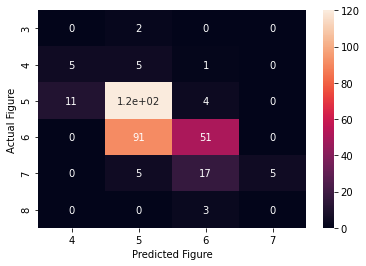

In [101]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = y_pred.astype(int)

r_matrix2 = pd.crosstab(y_test, y_pred, rownames=['Actual Figure'], colnames=['Predicted Figure'])
sn.heatmap(r_matrix2, annot=True)
print( metrics.accuracy_score(y_test, y_pred)) 
plt.show()

0.609375


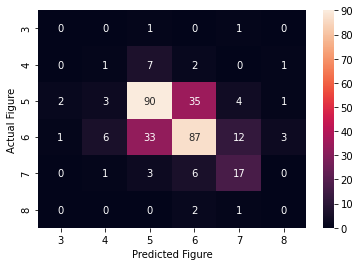

In [106]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred = y_pred.astype(int)

knn_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual Figure'], colnames=['Predicted Figure'])
sn.heatmap(knn_matrix, annot=True)
print(metrics.accuracy_score(y_test, y_pred))
plt.show()

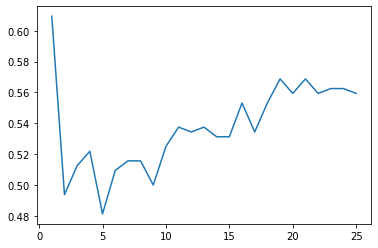

In [108]:
#b
k_range = range(1,26)
Averages = {}
Averagesin_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        Averages[k] = metrics.accuracy_score(y_test,y_pred)
        Averagesin_list.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(list(Averages.keys()), Averagesin_list)
plt.show()